In [1]:
######################################################################################   Regression

In [2]:
!pip install -q mlxtend
!pip install -q imbalanced-learn
!pip install -q itables
!pip install -q xgboost

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
import mlxtend
import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learning_Tahlildadeh"


from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

df = pd.read_csv(f'{data_path}/Student_performance_data _.csv')
df.shape

Mounted at /content/drive


(2392, 15)

In [4]:
df

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0            7         1                2                0       0      1   
1            0         0                1                0       0      0   
2           26         0                2                0       0      0   
3           14         0                3                1       0      0   
4           17         1                3                0       0      0   
...        ...       ...              ...              ...     ...    ...   
2387         2         0                4                1       0      0   
2388         4         1                4                0       1      0   
2389        20         0                2                0       0      0   
2390        17         0                2                0       1      1   
2391        13         0                2                0       0      0   

      Volunteering       GPA  GradeClass  
0                0  2.929196           2  
1                0  3.042915           1  
2                0  0.112602           4  
3                0  2.054218           3  
4                0  1.288061           4  
...            ...       ...         ...  
2387             0  3.455509           0  
2388             0  3.279150           4  
2389             1  1.142333           2  
2390             0  1.803297           1  
2391             1  2.140014           1  

[2392 rows x 15 columns]

In [5]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [6]:
df = df.drop(['StudentID','GradeClass'],axis=1)

In [7]:
df

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0      17       1          0                  2        19.833723         7   
1      18       0          0                  1        15.408756         0   
2      15       0          2                  3         4.210570        26   
3      17       1          0                  3        10.028829        14   
4      17       1          0                  2         4.672495        17   
...   ...     ...        ...                ...              ...       ...   
2387   18       1          0                  3        10.680555         2   
2388   17       0          0                  1         7.583217         4   
2389   16       1          0                  2         6.805500        20   
2390   16       1          1                  0        12.416653        17   
2391   16       1          0                  2        17.819907        13   

      Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0            1                2                0       0      1             0   
1            0                1                0       0      0             0   
2            0                2                0       0      0             0   
3            0                3                1       0      0             0   
4            1                3                0       0      0             0   
...        ...              ...              ...     ...    ...           ...   
2387         0                4                1       0      0             0   
2388         1                4                0       1      0             0   
2389         0                2                0       0      0             1   
2390         0                2                0       1      1             0   
2391         0                2                0       0      0             1   

           GPA  
0     2.929196  
1     3.042915  
2     0.112602  
3     2.054218  
4     1.288061  
...        ...  
2387  3.455509  
2388  3.279150  
2389  1.142333  
2390  1.803297  
2391  2.140014  

[2392 rows x 13 columns]

In [8]:
missing_values = df.isnull()
missing_summary = df.isnull().sum()

print(missing_summary)

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
dtype: int64


In [9]:
x = df.drop(['GPA'],axis=1)
y = df['GPA']

In [10]:
x

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0      17       1          0                  2        19.833723         7   
1      18       0          0                  1        15.408756         0   
2      15       0          2                  3         4.210570        26   
3      17       1          0                  3        10.028829        14   
4      17       1          0                  2         4.672495        17   
...   ...     ...        ...                ...              ...       ...   
2387   18       1          0                  3        10.680555         2   
2388   17       0          0                  1         7.583217         4   
2389   16       1          0                  2         6.805500        20   
2390   16       1          1                  0        12.416653        17   
2391   16       1          0                  2        17.819907        13   

      Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  
0            1                2                0       0      1             0  
1            0                1                0       0      0             0  
2            0                2                0       0      0             0  
3            0                3                1       0      0             0  
4            1                3                0       0      0             0  
...        ...              ...              ...     ...    ...           ...  
2387         0                4                1       0      0             0  
2388         1                4                0       1      0             0  
2389         0                2                0       0      0             1  
2390         0                2                0       1      1             0  
2391         0                2                0       0      0             1  

[2392 rows x 12 columns]

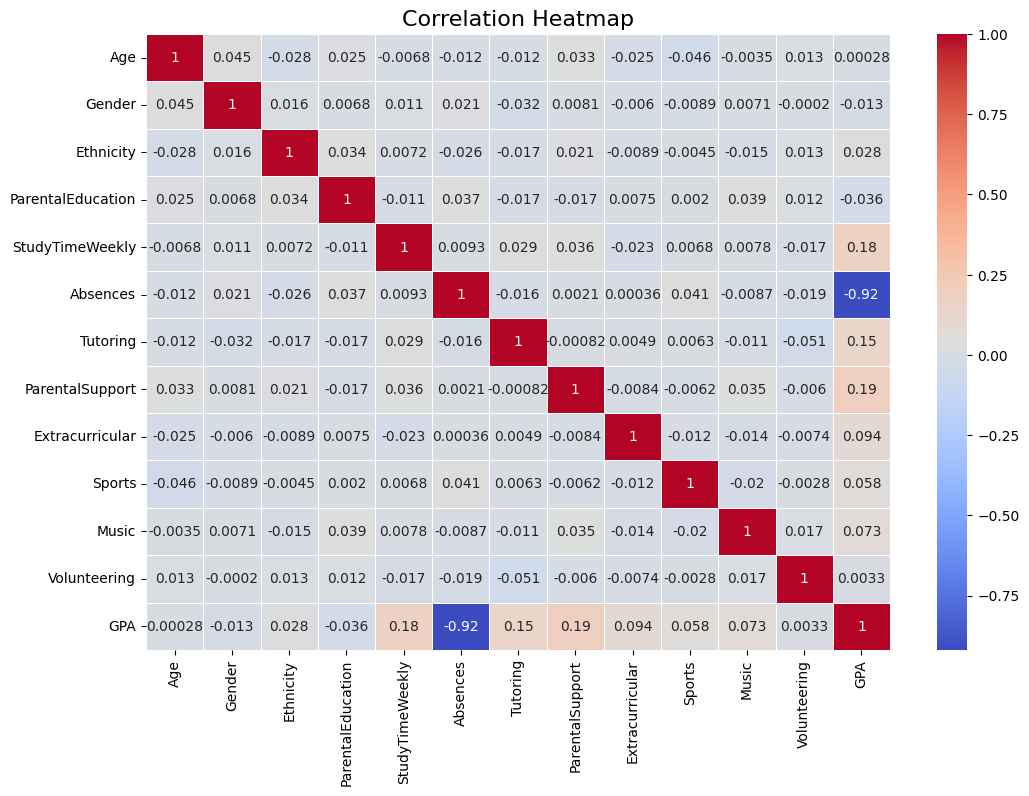

In [11]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA'],
      dtype='object')


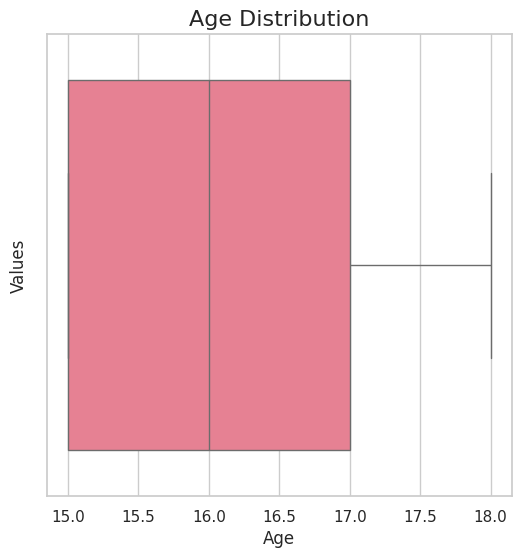

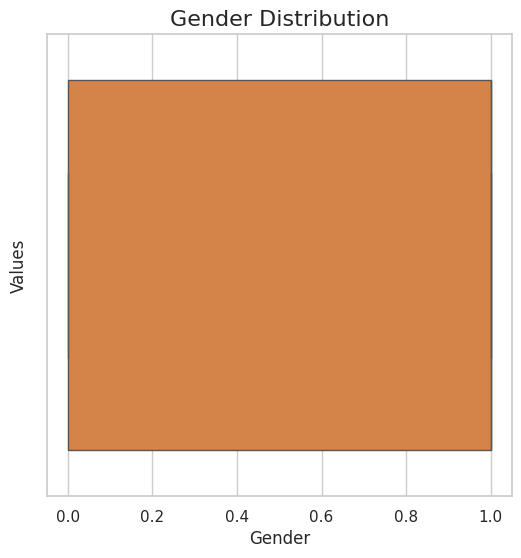

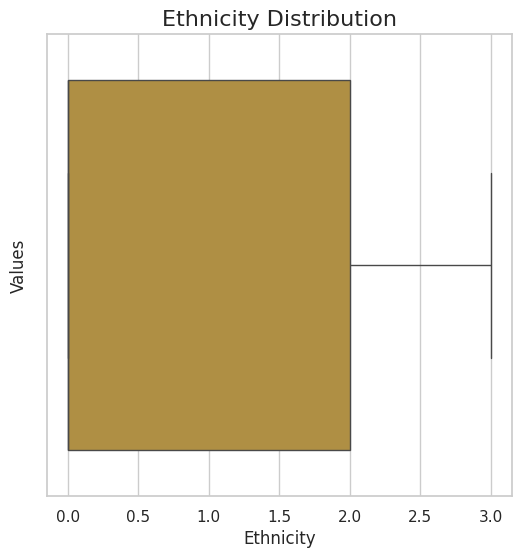

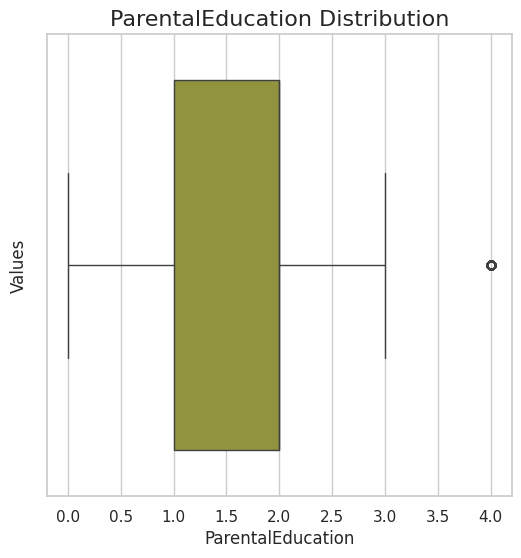

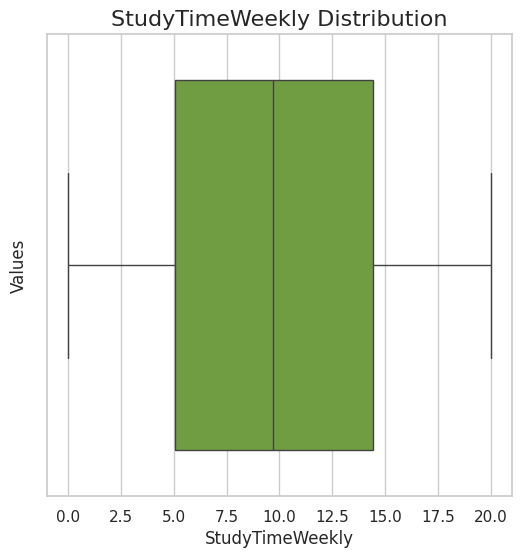

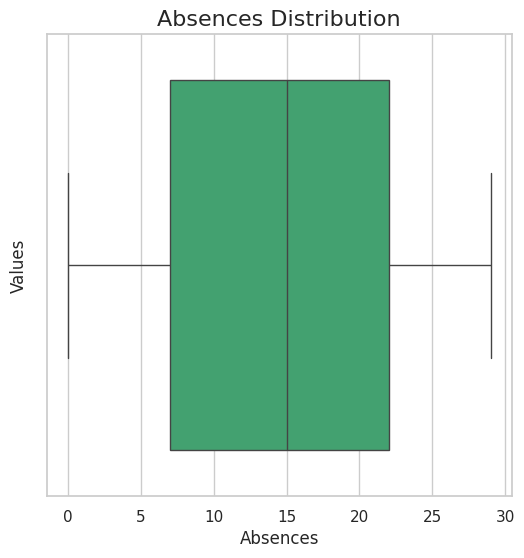

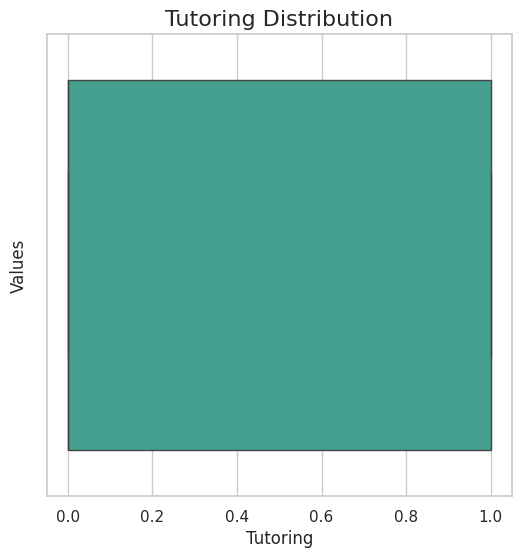

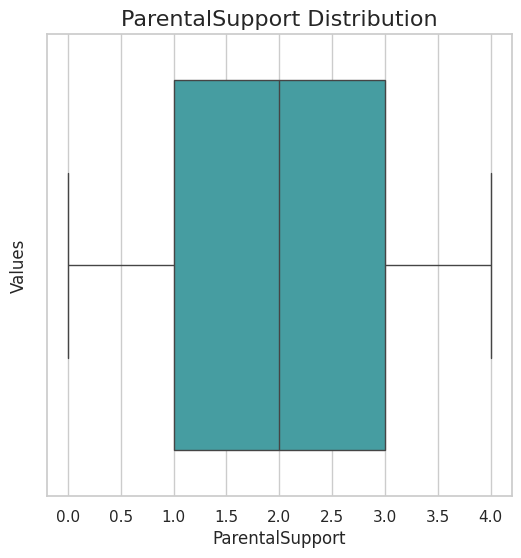

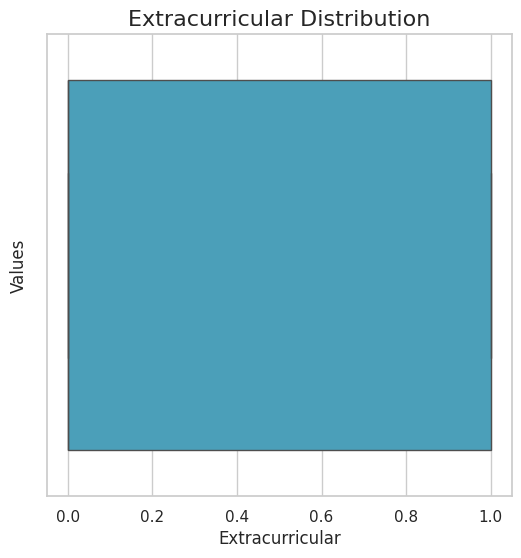

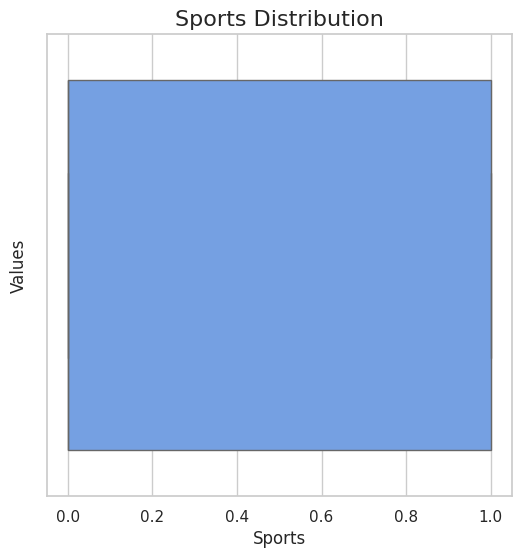

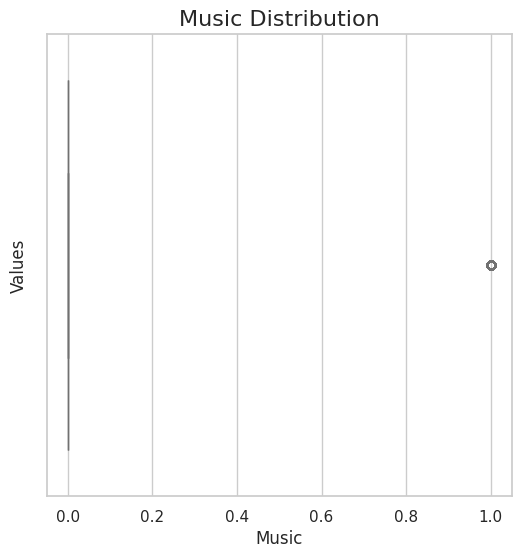

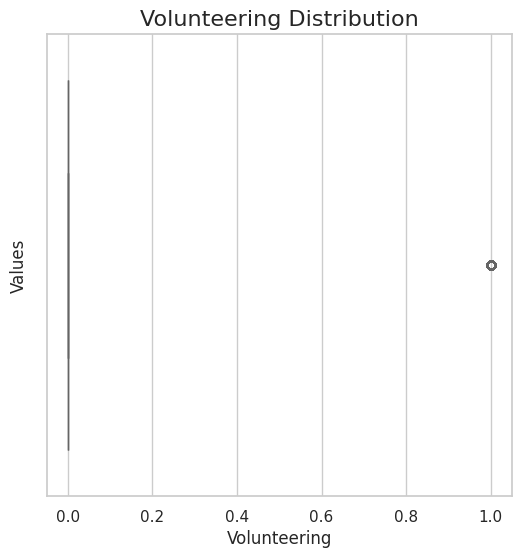

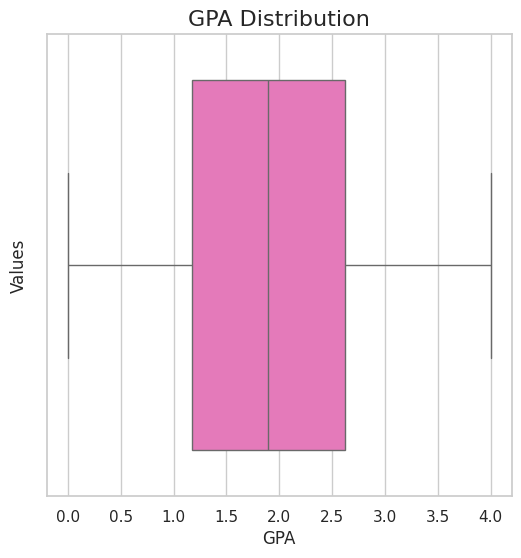

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


print(df.columns)
features = df.columns

sns.set(style="whitegrid")
color_palette = sns.color_palette("husl", len(features))

for i, feature in enumerate(features):
    if feature in df.columns:
        plt.figure(figsize=(6, 6))
        sns.boxplot(x=df[feature], palette=[color_palette[i]])
        plt.title(f'{feature} Distribution', fontsize=16)
        plt.xlabel(f'{feature}', fontsize=12)
        plt.ylabel('Values', fontsize=12)
        plt.show()
    else:
        print(f"Feature '{feature}' not found in DataFrame columns.")



In [13]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'Age':
Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64


Value counts for column 'Gender':
Gender
1    1222
0    1170
Name: count, dtype: int64


Value counts for column 'Ethnicity':
Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64


Value counts for column 'ParentalEducation':
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64


Value counts for column 'StudyTimeWeekly':
StudyTimeWeekly
19.833723    1
16.082185    1
2.543624     1
7.971184     1
3.403053     1
            ..
18.116988    1
10.324956    1
3.074986     1
18.434533    1
17.819907    1
Name: count, Length: 2392, dtype: int64


Value counts for column 'Absences':
Absences
25    93
13    93
12    92
8     91
19    90
20    90
6     88
15    87
23    86
7     86
1     85
27    84
14    84
5     83
21    83
17    81
24    81
26    80
3     79
16    79
18    79
11    71
22    71
2     69
29    69
4     69
0     67
9  

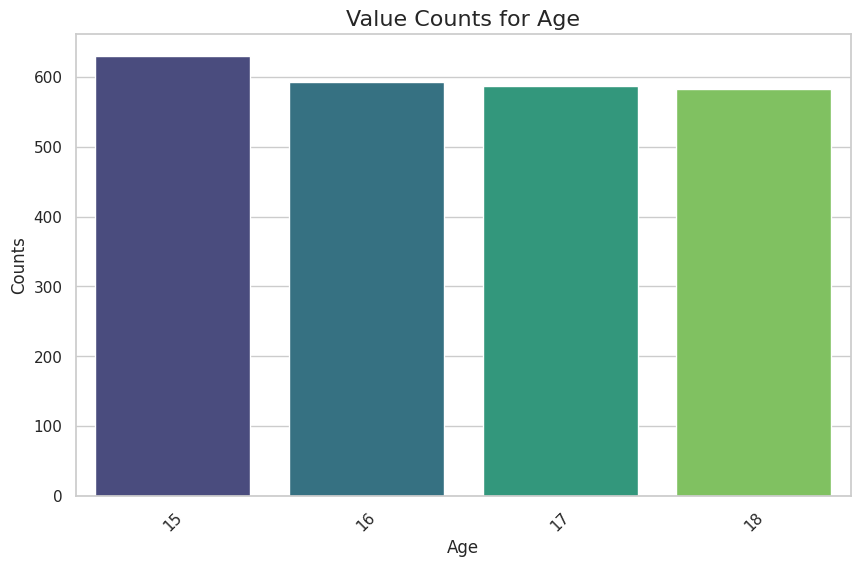

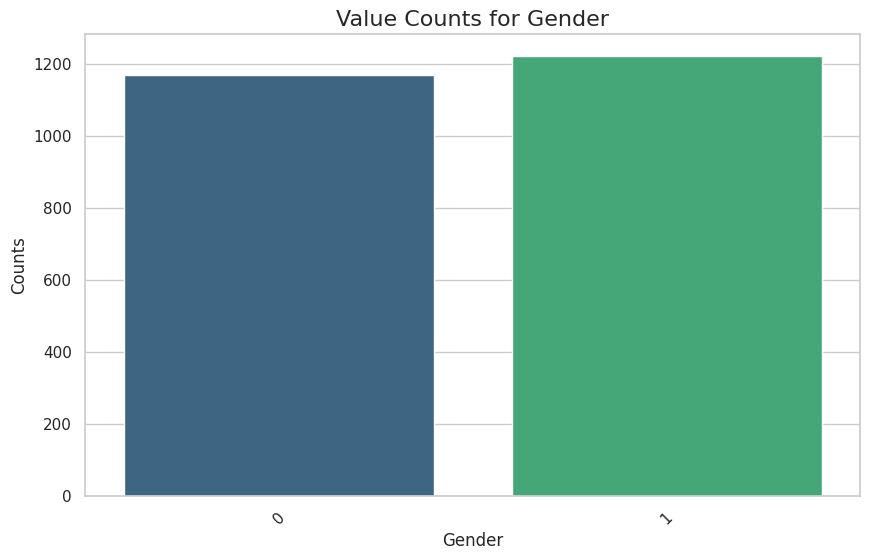

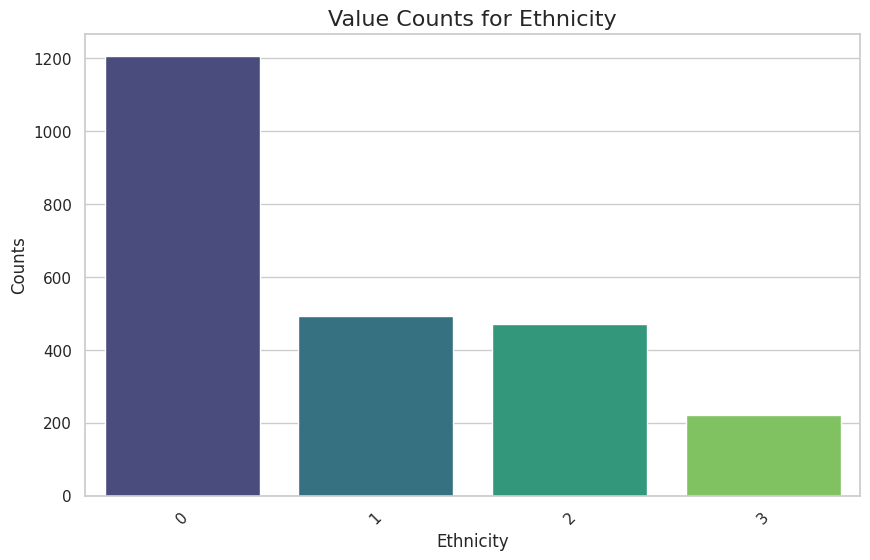

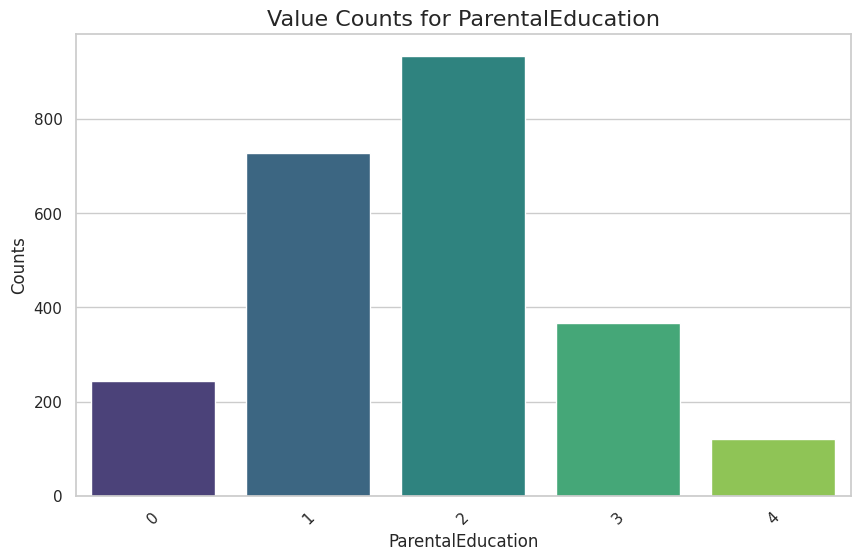

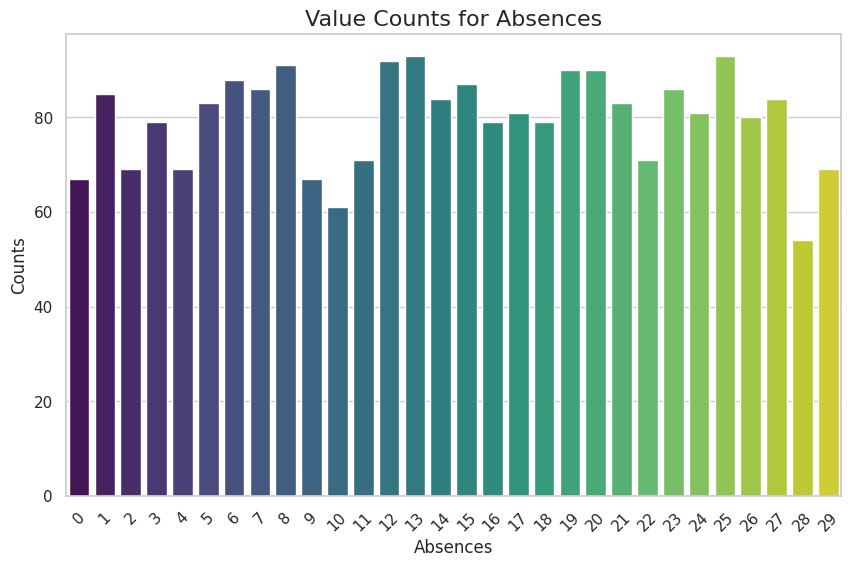

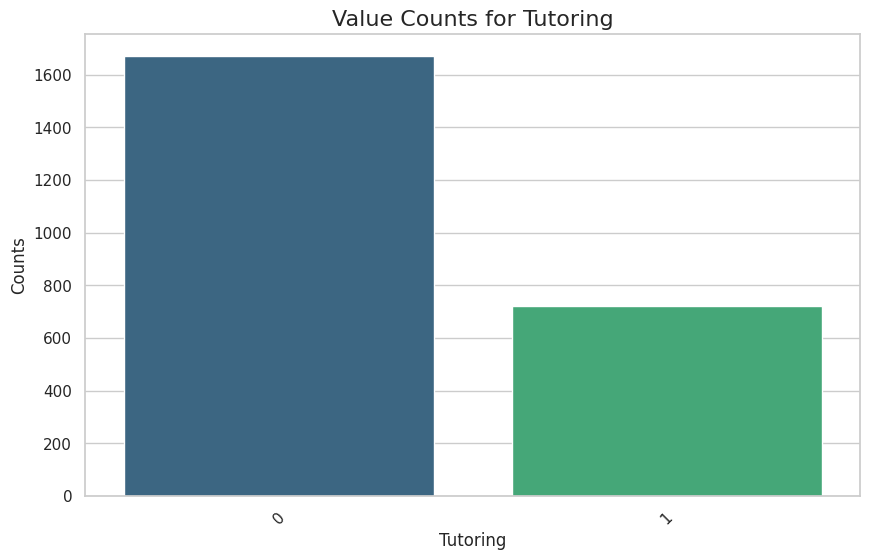

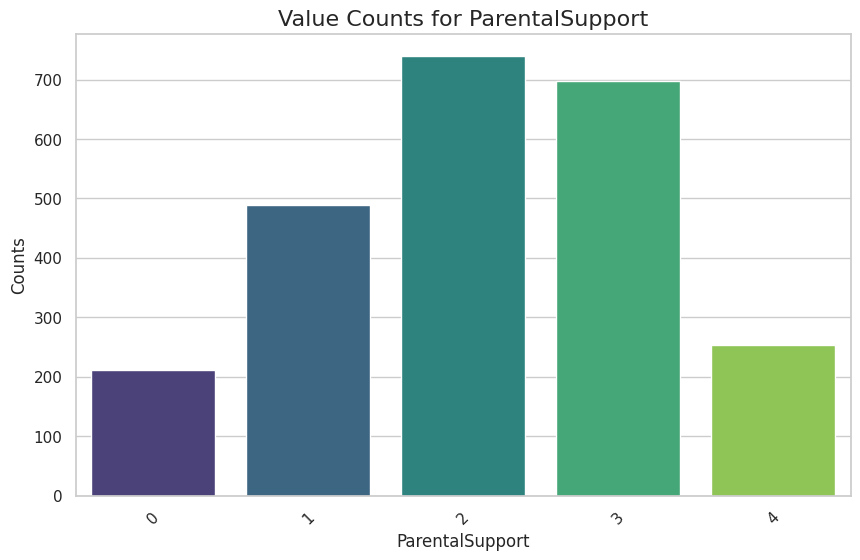

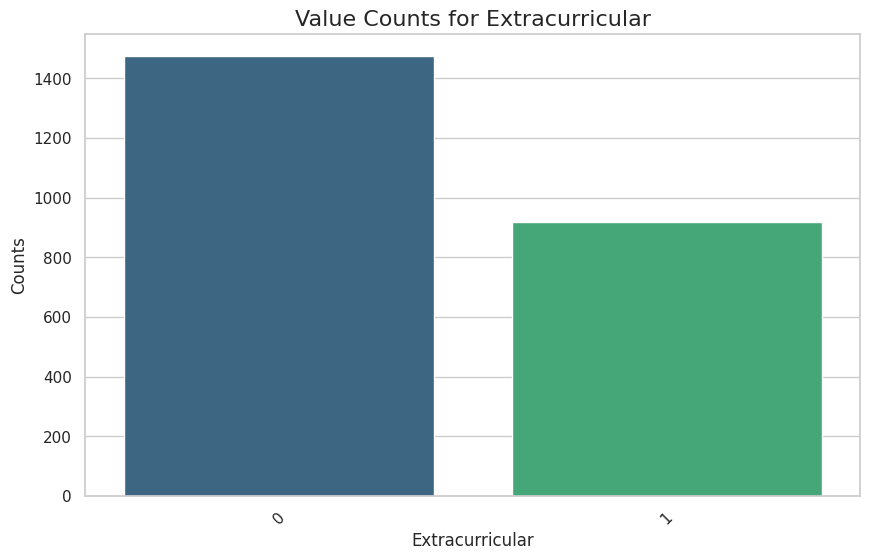

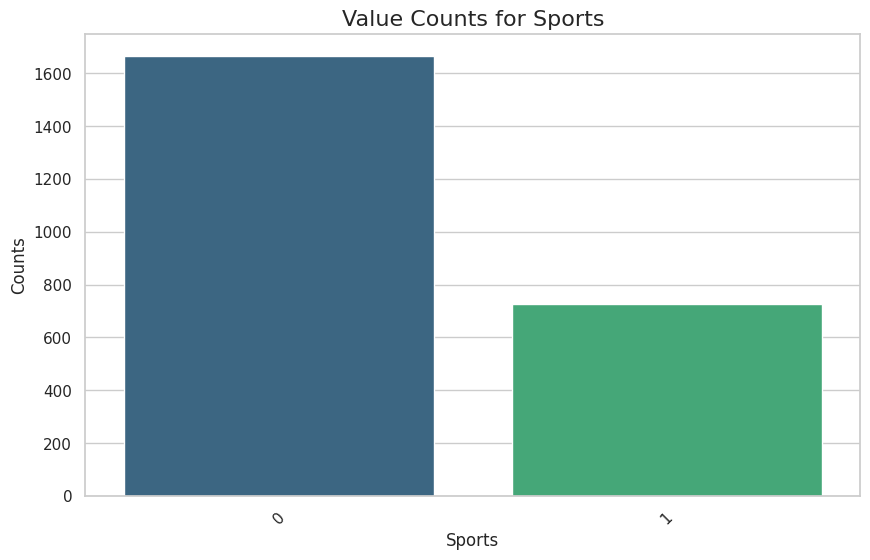

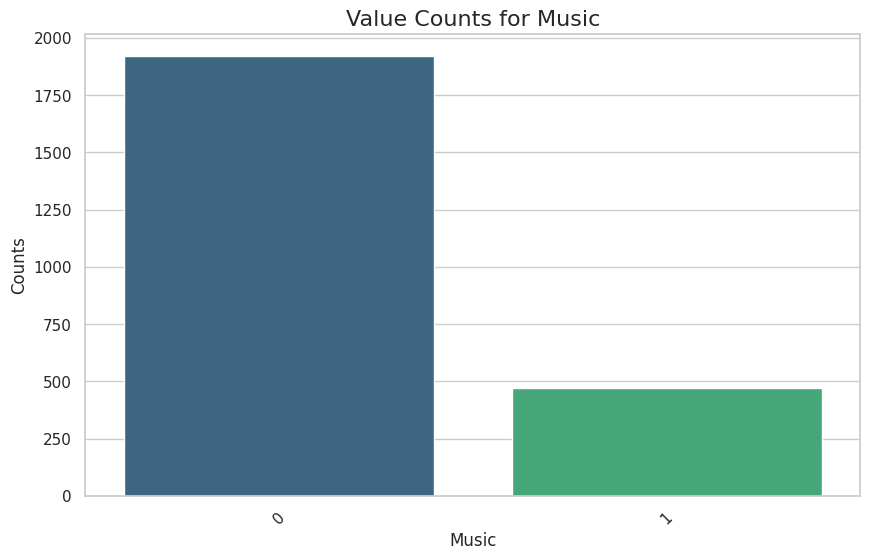

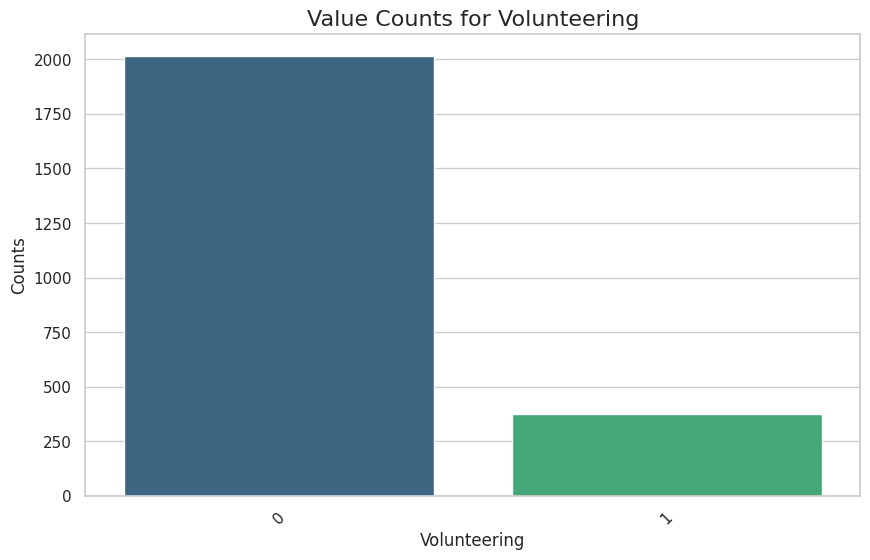

In [14]:
sns.set(style="whitegrid")

# List of columns to exclude
exclude_columns = ['GPA', 'StudyTimeWeekly']

for column in df.columns:
    if column not in exclude_columns:
        plt.figure(figsize=(10, 6))
        value_counts = df[column].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Value Counts for {column}', fontsize=16)
        plt.xlabel(f'{column}', fontsize=12)
        plt.ylabel('Counts', fontsize=12)
        plt.xticks(rotation=45)
        plt.show()


In [15]:
# Function to replace outliers using IQR method
def replace_outliers_iqr(df):
    for column in df.columns:
        if df[column].dtype in [np.float64, np.int64]:  # Only process numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            upper_cap = Q3 + 1.5 * IQR
            lower_cap = Q1 - 1.5 * IQR

            df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])
            df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])

    return df


GPA = df['GPA']
cf = df.drop(columns=['GPA'])

cleaned_data = replace_outliers_iqr(cf)

cleaned_data['GPA'] = GPA

df = cleaned_data

In [16]:
df

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0     17.0     1.0        0.0                2.0        19.833723       7.0   
1     18.0     0.0        0.0                1.0        15.408756       0.0   
2     15.0     0.0        2.0                3.0         4.210570      26.0   
3     17.0     1.0        0.0                3.0        10.028829      14.0   
4     17.0     1.0        0.0                2.0         4.672495      17.0   
...    ...     ...        ...                ...              ...       ...   
2387  18.0     1.0        0.0                3.0        10.680555       2.0   
2388  17.0     0.0        0.0                1.0         7.583217       4.0   
2389  16.0     1.0        0.0                2.0         6.805500      20.0   
2390  16.0     1.0        1.0                0.0        12.416653      17.0   
2391  16.0     1.0        0.0                2.0        17.819907      13.0   

      Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0          1.0              2.0              0.0     0.0    0.0           0.0   
1          0.0              1.0              0.0     0.0    0.0           0.0   
2          0.0              2.0              0.0     0.0    0.0           0.0   
3          0.0              3.0              1.0     0.0    0.0           0.0   
4          1.0              3.0              0.0     0.0    0.0           0.0   
...        ...              ...              ...     ...    ...           ...   
2387       0.0              4.0              1.0     0.0    0.0           0.0   
2388       1.0              4.0              0.0     1.0    0.0           0.0   
2389       0.0              2.0              0.0     0.0    0.0           0.0   
2390       0.0              2.0              0.0     1.0    0.0           0.0   
2391       0.0              2.0              0.0     0.0    0.0           0.0   

           GPA  
0     2.929196  
1     3.042915  
2     0.112602  
3     2.054218  
4     1.288061  
...        ...  
2387  3.455509  
2388  3.279150  
2389  1.142333  
2390  1.803297  
2391  2.140014  

[2392 rows x 13 columns]

In [17]:
x = df.drop(['GPA'],axis=1)
y = df['GPA']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=1)

In [18]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   float64
 1   Gender             2392 non-null   float64
 2   Ethnicity          2392 non-null   float64
 3   ParentalEducation  2392 non-null   float64
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   float64
 6   Tutoring           2392 non-null   float64
 7   ParentalSupport    2392 non-null   float64
 8   Extracurricular    2392 non-null   float64
 9   Sports             2392 non-null   float64
 10  Music              2392 non-null   float64
 11  Volunteering       2392 non-null   float64
 12  GPA                2392 non-null   float64
dtypes: float64(13)
memory usage: 243.1 KB


In [20]:
df.describe()

Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000        2392.000000   
mean     16.468645     0.510870     0.877508           1.721154   
std       1.123798     0.499986     1.028476           0.948487   
min      15.000000     0.000000     0.000000           0.000000   
25%      15.000000     0.000000     0.000000           1.000000   
50%      16.000000     1.000000     0.000000           2.000000   
75%      17.000000     1.000000     2.000000           2.000000   
max      18.000000     1.000000     3.000000           3.500000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min           0.001057     0.000000     0.000000         0.000000   
25%           5.043079     7.000000     0.000000         1.000000   
50%           9.705363    15.000000     0.000000         2.000000   
75%          14.408410    22.000000     1.000000         3.000000   
max          19.978094    29.000000     1.000000         4.000000   

       Extracurricular       Sports   Music  Volunteering          GPA  
count      2392.000000  2392.000000  2392.0        2392.0  2392.000000  
mean          0.383361     0.303512     0.0           0.0     1.906186  
std           0.486307     0.459870     0.0           0.0     0.915156  
min           0.000000     0.000000     0.0           0.0     0.000000  
25%           0.000000     0.000000     0.0           0.0     1.174803  
50%           0.000000     0.000000     0.0           0.0     1.893393  
75%           1.000000     1.000000     0.0           0.0     2.622216  
max           1.000000     1.000000     0.0           0.0     4.000000

In [21]:
mmy = MinMaxScaler((0,4))
mm_StudyTimeWeekly = MinMaxScaler(feature_range=(0, 4))
mm_Age = MinMaxScaler(feature_range=(0, 4))
mm_Absences = MinMaxScaler(feature_range=(0, 4))

x_train['StudyTimeWeekly'] = mm_StudyTimeWeekly.fit_transform(x_train['StudyTimeWeekly'].values.reshape(-1,1))
x_train['Age'] = mm_Age.fit_transform(x_train['Age'].values.reshape(-1,1))
x_train['Absences'] = mm_Absences.fit_transform(x_train['Absences'].values.reshape(-1,1))


x_test['StudyTimeWeekly'] = mm_StudyTimeWeekly.transform(x_test['StudyTimeWeekly'].values.reshape(-1,1))
x_test['Age'] = mm_Age.transform(x_test['Age'].values.reshape(-1,1))
x_test['Absences'] = mm_Absences.fit_transform(x_test['Absences'].values.reshape(-1,1))


y_mm_train = mmy.fit_transform(y_train.values.reshape(-1,1))
y_mm_test = mmy.transform(y_test.values.reshape(-1,1))

In [22]:
x_train

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
1450  4.000000     0.0        0.0                1.0         1.108614   
2155  4.000000     1.0        1.0                1.0         3.066269   
1265  2.666667     1.0        1.0                3.0         0.827484   
1407  0.000000     0.0        1.0                2.0         0.886323   
270   1.333333     1.0        0.0                2.0         2.231714   
...        ...     ...        ...                ...              ...   
960   0.000000     0.0        3.0                1.0         1.586140   
905   1.333333     1.0        0.0                2.0         0.567165   
1096  1.333333     1.0        0.0                1.0         0.277984   
235   4.000000     1.0        1.0                3.0         1.788176   
1061  0.000000     1.0        0.0                1.0         3.174090   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
1450  1.517241       0.0              2.0              0.0     0.0    0.0   
2155  1.793103       1.0              4.0              0.0     0.0    0.0   
1265  2.482759       0.0              1.0              1.0     0.0    0.0   
1407  2.758621       0.0              2.0              1.0     1.0    0.0   
270   2.068966       0.0              3.0              0.0     0.0    0.0   
...        ...       ...              ...              ...     ...    ...   
960   0.827586       0.0              1.0              0.0     1.0    0.0   
905   3.724138       0.0              1.0              0.0     0.0    0.0   
1096  0.413793       1.0              2.0              1.0     0.0    0.0   
235   0.275862       0.0              0.0              0.0     1.0    0.0   
1061  0.827586       0.0              4.0              1.0     0.0    0.0   

      Volunteering  
1450           0.0  
2155           0.0  
1265           0.0  
1407           0.0  
270            0.0  
...            ...  
960            0.0  
905            0.0  
1096           0.0  
235            0.0  
1061           0.0  

[1913 rows x 12 columns]

In [23]:
y_train

1450    1.774531
2155    2.565368
1265    1.183064
1407    1.355053
270     1.663063
          ...   
960     2.397183
905     0.339715
1096    3.358694
235     2.511743
1061    3.460885
Name: GPA, Length: 1913, dtype: float64

In [24]:
from xgboost import XGBRegressor
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score,
                             mean_absolute_percentage_error)

model = XGBRegressor(n_estimators=150, max_depth=2,
                     learning_rate=0.1, subsample=0.5,
                     colsample_bytree=0.7, random_state=42)

model.fit(x_train, y_mm_train)

y_pred = model.predict(x_test)

y_pred = mmy.inverse_transform(y_pred.reshape(-1, 1))

print('Test Metrics')
print('R2: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))


print('##################################################################')

y_pred = model.predict(x_train)
y_pred = mmy.inverse_transform(y_pred.reshape(-1, 1))

print('Train Metrics')
print('R2: ', r2_score(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('MAE: ', mean_absolute_error(y_train, y_pred))


Test Metrics
R2:  0.9474921691789099
MSE:  0.042576469447605084
MAE:  0.1611521079878765
##################################################################
Train Metrics
R2:  0.9540268691930343
MSE:  0.03875518220649704
MAE:  0.15804150514042214


In [25]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score,
                             mean_absolute_percentage_error)

xgb_model = XGBRegressor(n_estimators=1000, max_depth=5,
                         learning_rate=0.1, subsample=0.5,
                         colsample_bytree=0.7, random_state=42)

rf_model = RandomForestRegressor(n_estimators=1000, max_depth=5,
                                 max_features=0.7, max_samples=0.5,
                                 random_state=42)

sgd_model = SGDRegressor(random_state=42, penalty='l1')

svr_model = SVR(kernel='rbf')

voting_regressor = VotingRegressor(
    estimators=[('xgb', xgb_model), ('rf', rf_model),
                ('sgd', sgd_model), ('svr', svr_model)]
)

voting_regressor.fit(x_train, y_mm_train)


print('##################################################################### Test')
y_pred = voting_regressor.predict(x_test)

y_pred = mmy.inverse_transform(y_pred.reshape(-1, 1))

print('R2: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

print('##################################################################### Train')
y_pred = voting_regressor.predict(x_train)

y_pred = mmy.inverse_transform(y_pred.reshape(-1, 1))

print('R2: ', r2_score(y_train, y_pred))
print('MSE: ', mean_squared_error(y_train, y_pred))
print('MAE: ', mean_absolute_error(y_train, y_pred))


##################################################################### Test
R2:  0.9454401377832269
MSE:  0.044240378442846395
MAE:  0.16533627238788365
##################################################################### Train
R2:  0.9707975528677729
MSE:  0.0246175568124148
MAE:  0.12543959723446016


In [26]:
#############################################################################################   Classification

In [27]:
!pip install -q mlxtend
!pip install -q imbalanced-learn
!pip install -q itables
!pip install -q xgboost

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
import mlxtend
import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

In [28]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learning_Tahlildadeh"


from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

df = pd.read_csv(f'{data_path}/Student_performance_data _.csv')
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(2392, 15)

In [29]:
df

StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0          1001   17       1          0                  2        19.833723   
1          1002   18       0          0                  1        15.408756   
2          1003   15       0          2                  3         4.210570   
3          1004   17       1          0                  3        10.028829   
4          1005   17       1          0                  2         4.672495   
...         ...  ...     ...        ...                ...              ...   
2387       3388   18       1          0                  3        10.680555   
2388       3389   17       0          0                  1         7.583217   
2389       3390   16       1          0                  2         6.805500   
2390       3391   16       1          1                  0        12.416653   
2391       3392   16       1          0                  2        17.819907   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0            7         1                2                0       0      1   
1            0         0                1                0       0      0   
2           26         0                2                0       0      0   
3           14         0                3                1       0      0   
4           17         1                3                0       0      0   
...        ...       ...              ...              ...     ...    ...   
2387         2         0                4                1       0      0   
2388         4         1                4                0       1      0   
2389        20         0                2                0       0      0   
2390        17         0                2                0       1      1   
2391        13         0                2                0       0      0   

      Volunteering       GPA  GradeClass  
0                0  2.929196           2  
1                0  3.042915           1  
2                0  0.112602           4  
3                0  2.054218           3  
4                0  1.288061           4  
...            ...       ...         ...  
2387             0  3.455509           0  
2388             0  3.279150           4  
2389             1  1.142333           2  
2390             0  1.803297           1  
2391             1  2.140014           1  

[2392 rows x 15 columns]

In [30]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [31]:
df = df.drop(['StudentID','GPA'],axis=1)

In [32]:
df

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0      17       1          0                  2        19.833723         7   
1      18       0          0                  1        15.408756         0   
2      15       0          2                  3         4.210570        26   
3      17       1          0                  3        10.028829        14   
4      17       1          0                  2         4.672495        17   
...   ...     ...        ...                ...              ...       ...   
2387   18       1          0                  3        10.680555         2   
2388   17       0          0                  1         7.583217         4   
2389   16       1          0                  2         6.805500        20   
2390   16       1          1                  0        12.416653        17   
2391   16       1          0                  2        17.819907        13   

      Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0            1                2                0       0      1             0   
1            0                1                0       0      0             0   
2            0                2                0       0      0             0   
3            0                3                1       0      0             0   
4            1                3                0       0      0             0   
...        ...              ...              ...     ...    ...           ...   
2387         0                4                1       0      0             0   
2388         1                4                0       1      0             0   
2389         0                2                0       0      0             1   
2390         0                2                0       1      1             0   
2391         0                2                0       0      0             1   

      GradeClass  
0              2  
1              1  
2              4  
3              3  
4              4  
...          ...  
2387           0  
2388           4  
2389           2  
2390           1  
2391           1  

[2392 rows x 13 columns]

In [33]:
missing_values = df.isnull()
missing_summary = df.isnull().sum()

print(missing_summary)

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GradeClass           0
dtype: int64


In [34]:
x = df.drop(['GradeClass'],axis=1)
y = df['GradeClass']

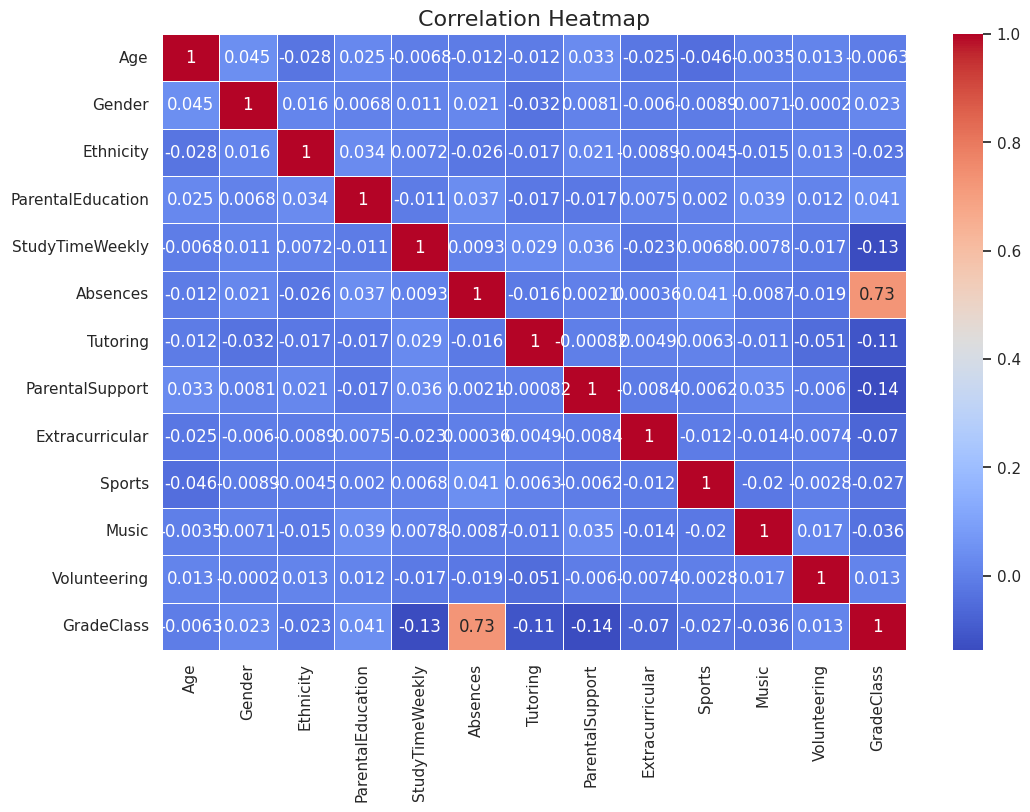

In [35]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GradeClass'],
      dtype='object')


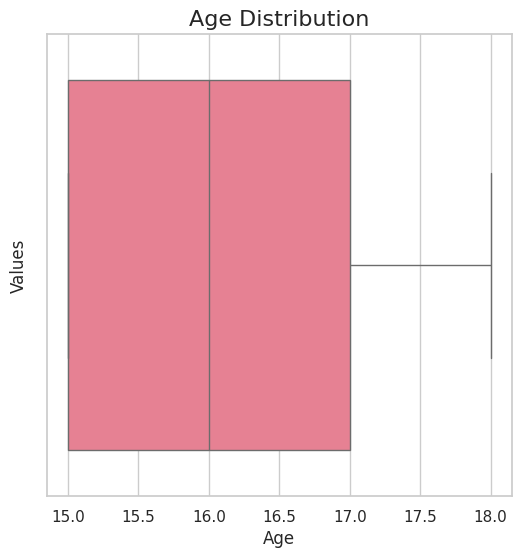

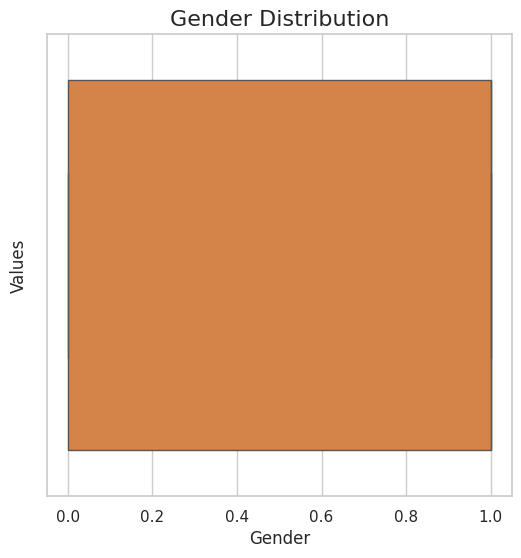

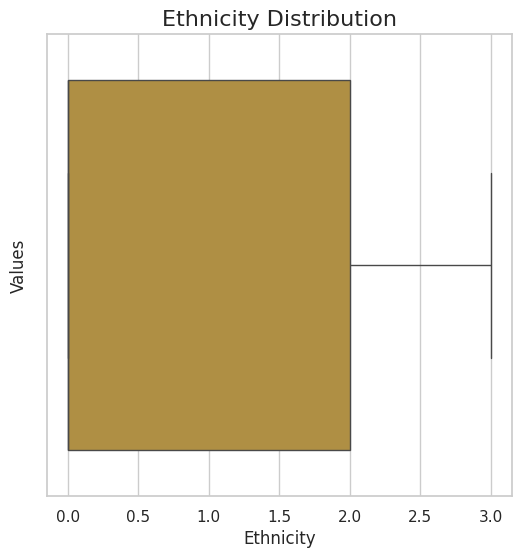

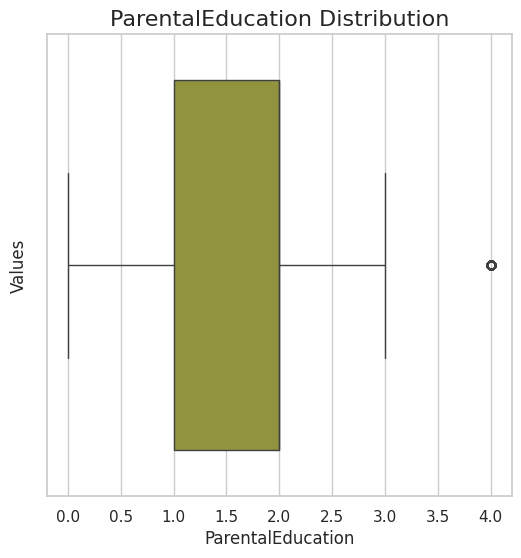

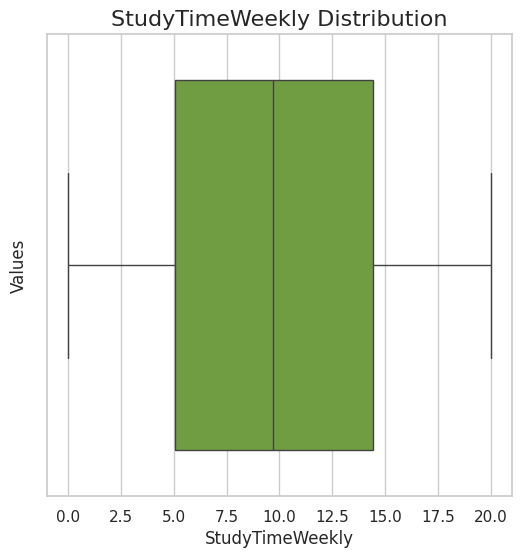

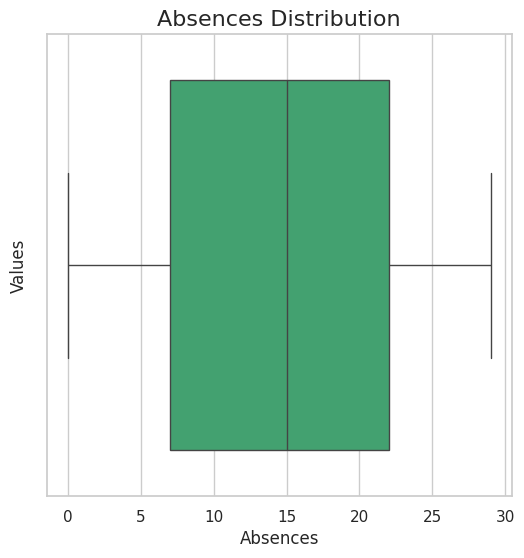

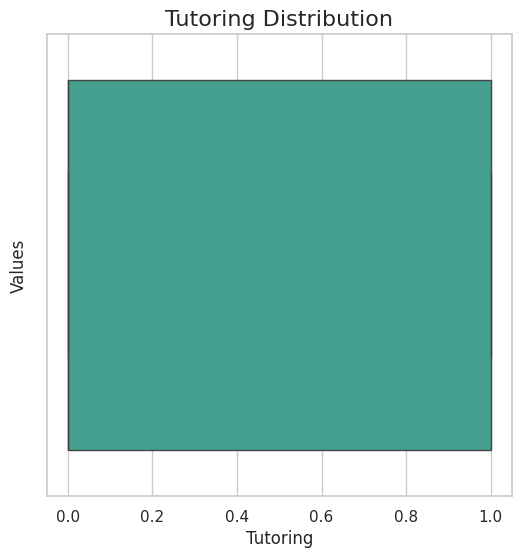

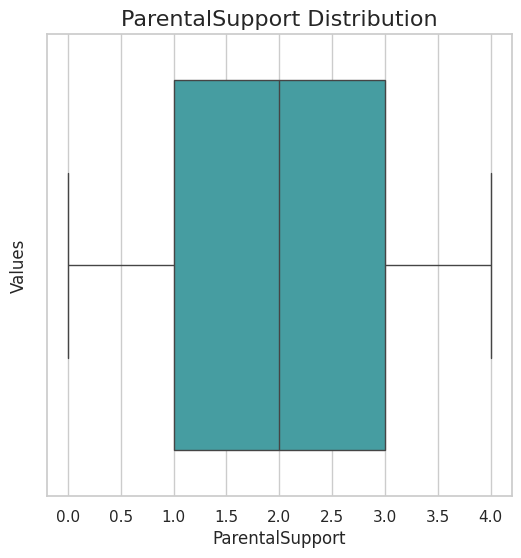

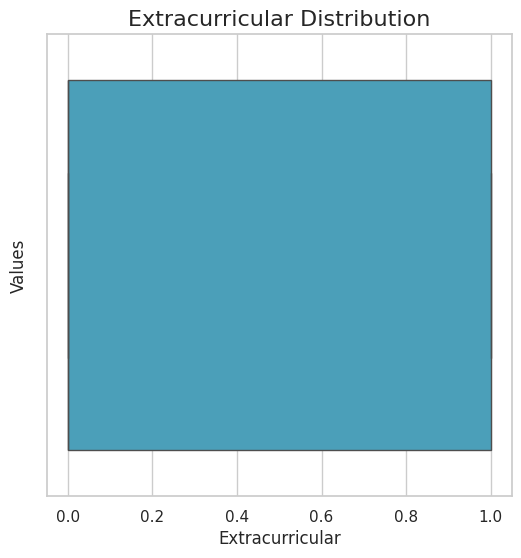

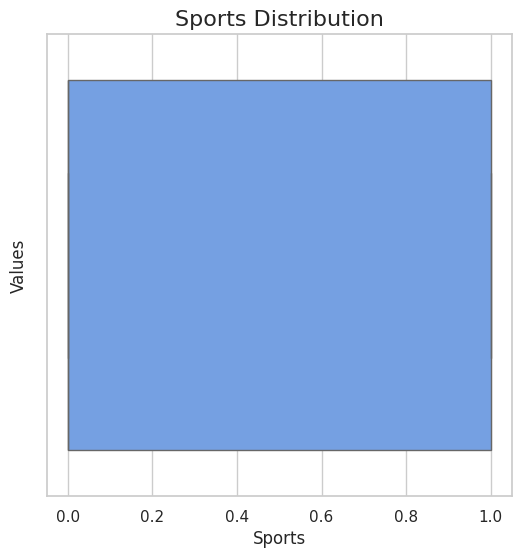

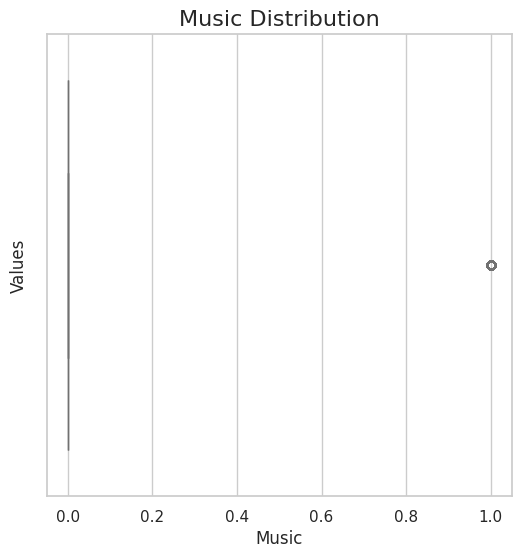

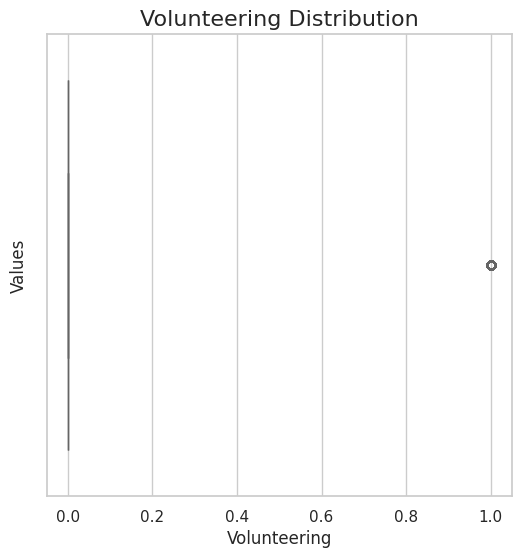

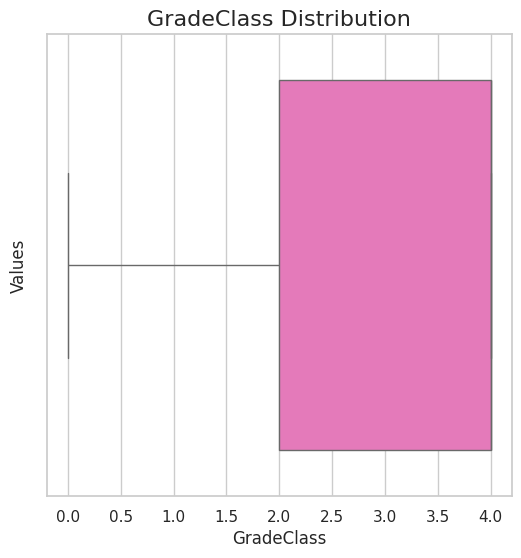

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


print(df.columns)
features = df.columns

sns.set(style="whitegrid")
color_palette = sns.color_palette("husl", len(features))

for i, feature in enumerate(features):
    if feature in df.columns:
        plt.figure(figsize=(6, 6))
        sns.boxplot(x=df[feature], palette=[color_palette[i]])
        plt.title(f'{feature} Distribution', fontsize=16)
        plt.xlabel(f'{feature}', fontsize=12)
        plt.ylabel('Values', fontsize=12)
        plt.show()
    else:
        print(f"Feature '{feature}' not found in DataFrame columns.")



In [37]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n")

Value counts for column 'Age':
Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64


Value counts for column 'Gender':
Gender
1    1222
0    1170
Name: count, dtype: int64


Value counts for column 'Ethnicity':
Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64


Value counts for column 'ParentalEducation':
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64


Value counts for column 'StudyTimeWeekly':
StudyTimeWeekly
19.833723    1
16.082185    1
2.543624     1
7.971184     1
3.403053     1
            ..
18.116988    1
10.324956    1
3.074986     1
18.434533    1
17.819907    1
Name: count, Length: 2392, dtype: int64


Value counts for column 'Absences':
Absences
25    93
13    93
12    92
8     91
19    90
20    90
6     88
15    87
23    86
7     86
1     85
27    84
14    84
5     83
21    83
17    81
24    81
26    80
3     79
16    79
18    79
11    71
22    71
2     69
29    69
4     69
0     67
9  

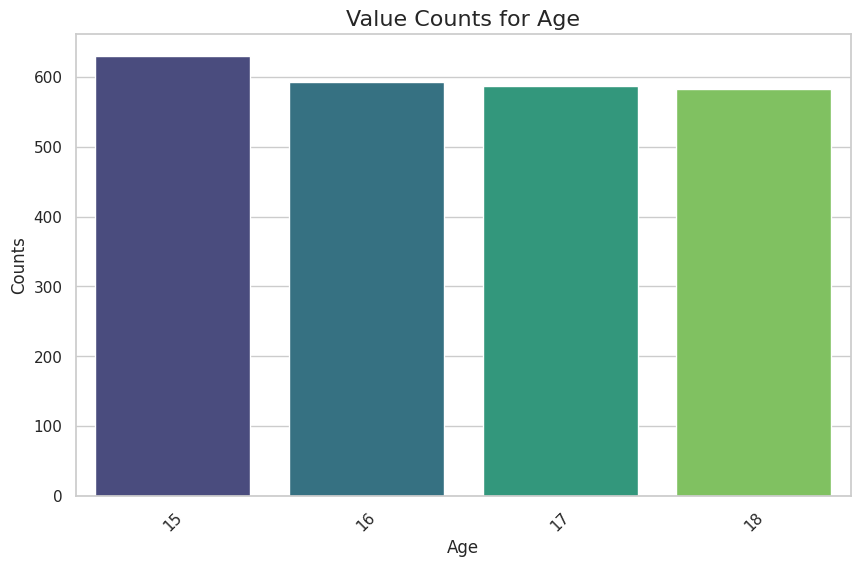

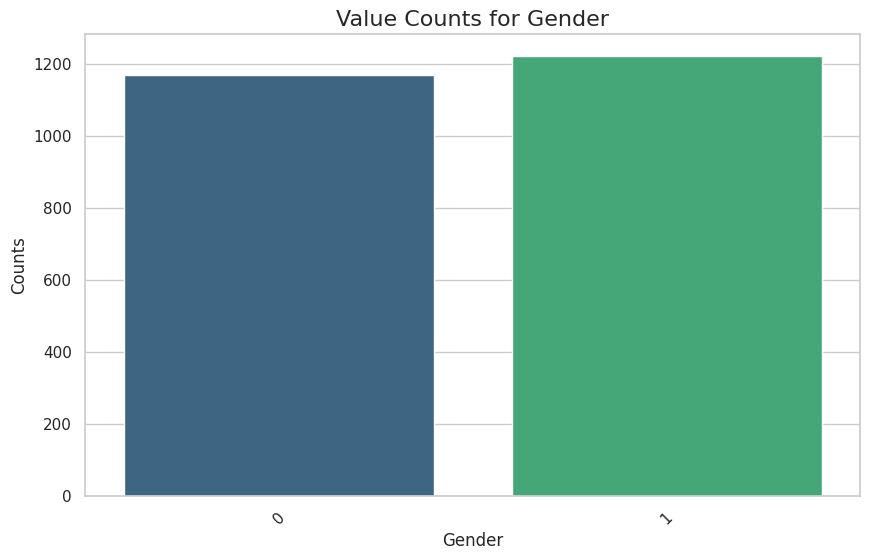

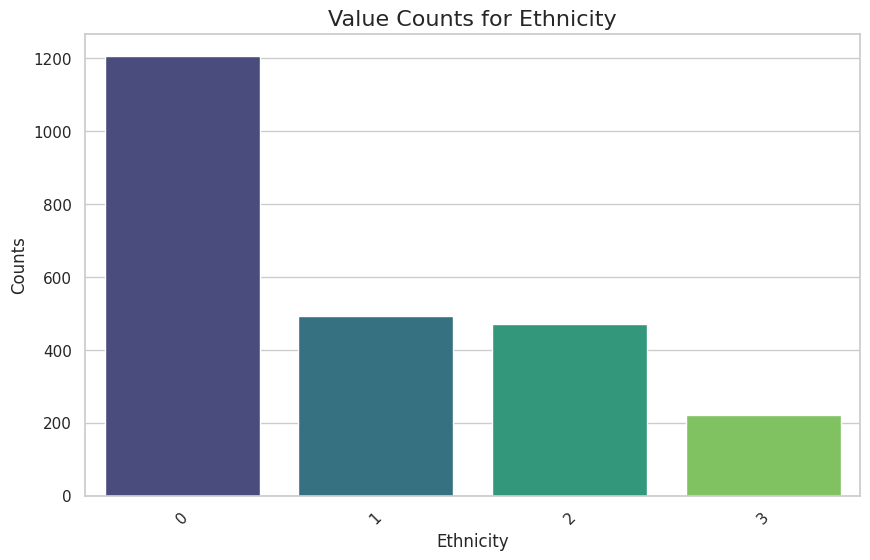

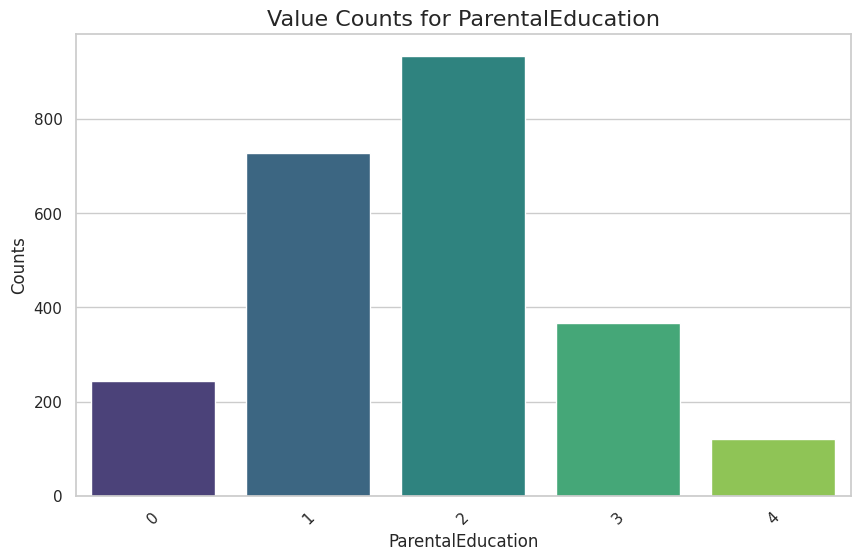

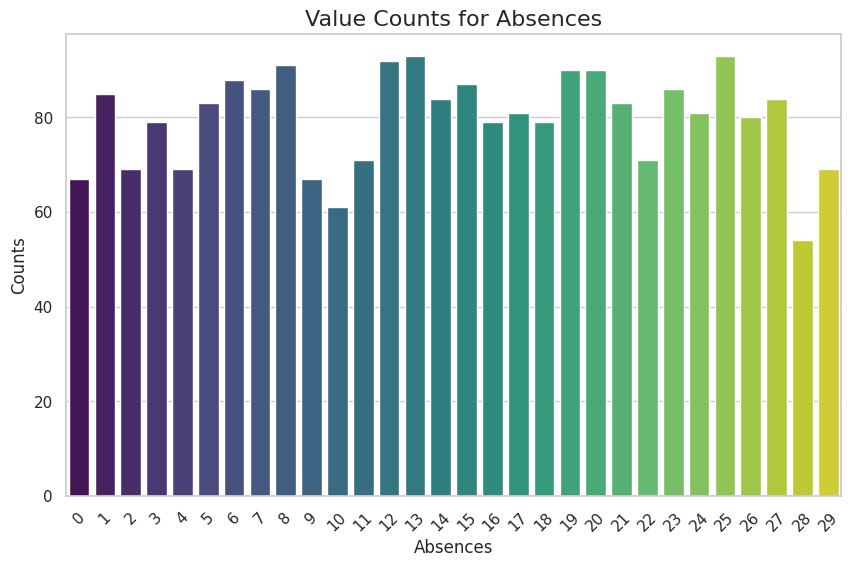

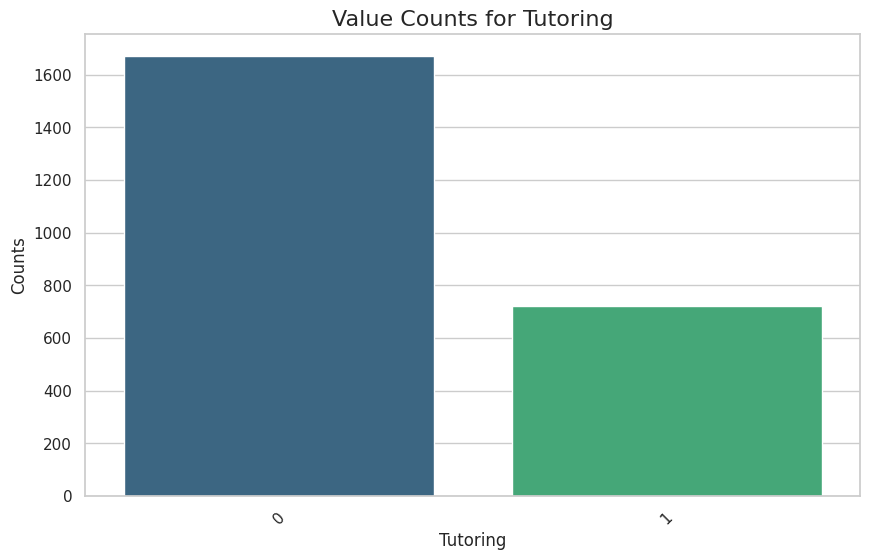

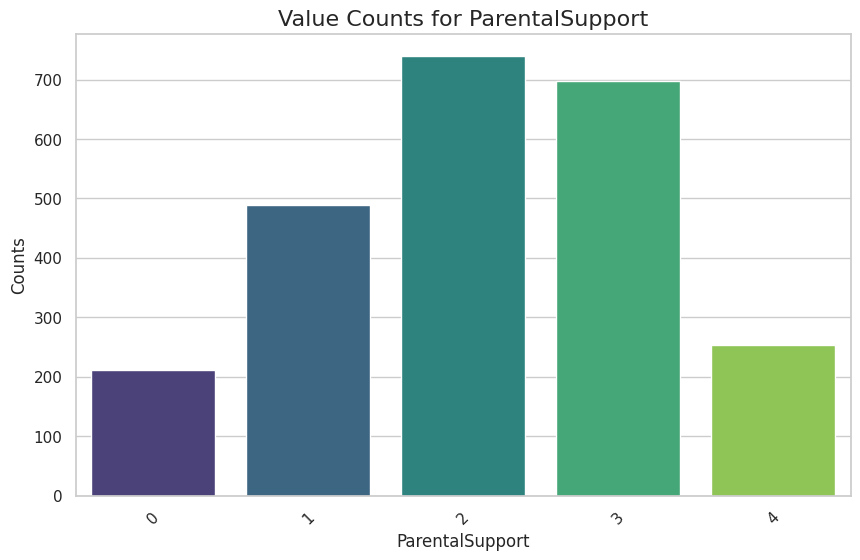

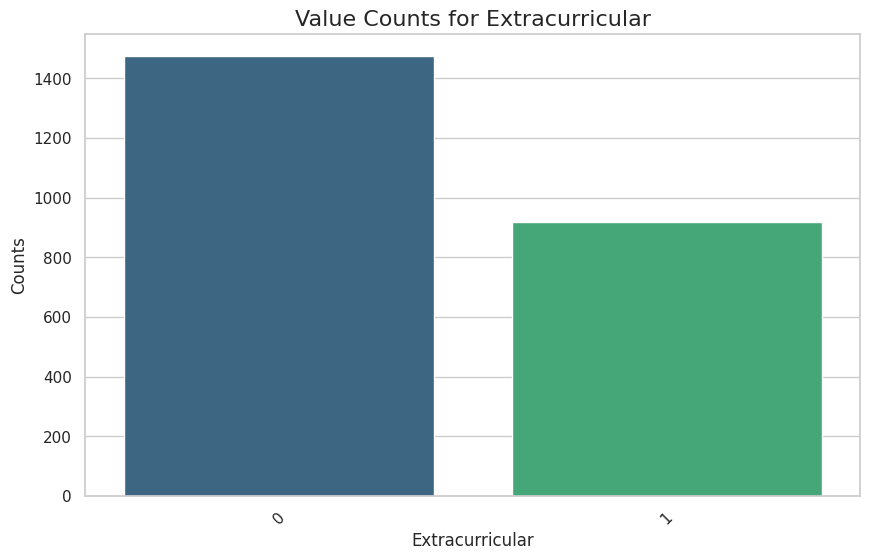

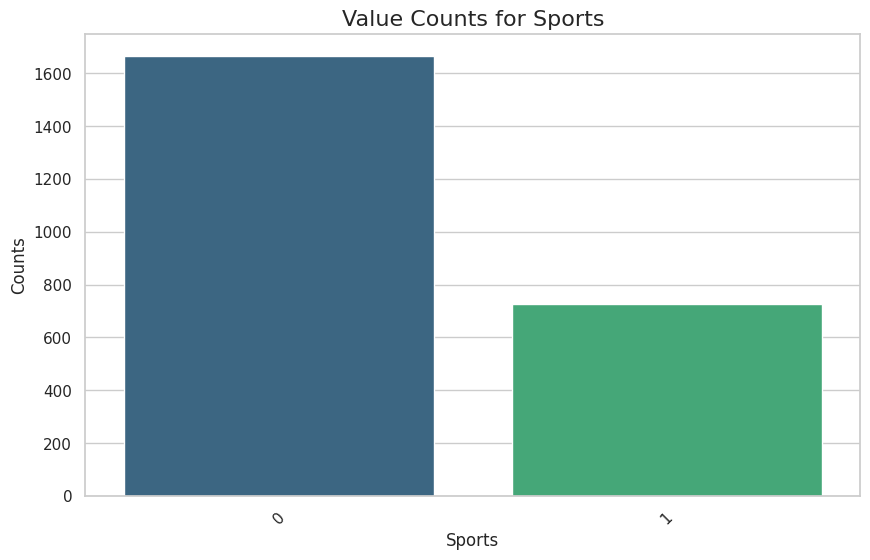

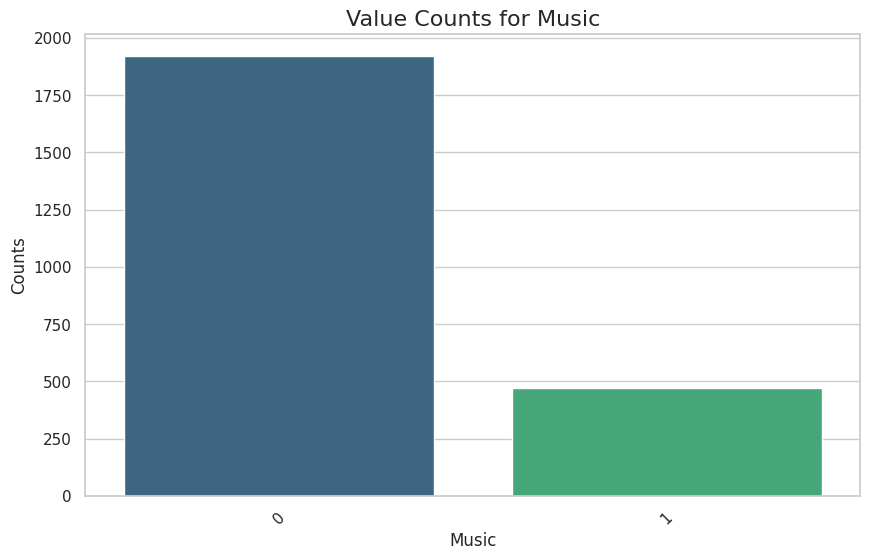

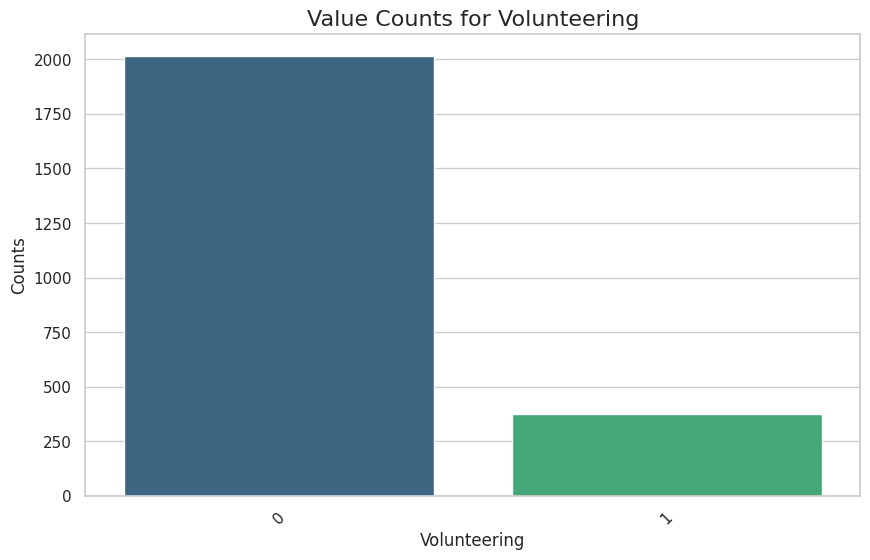

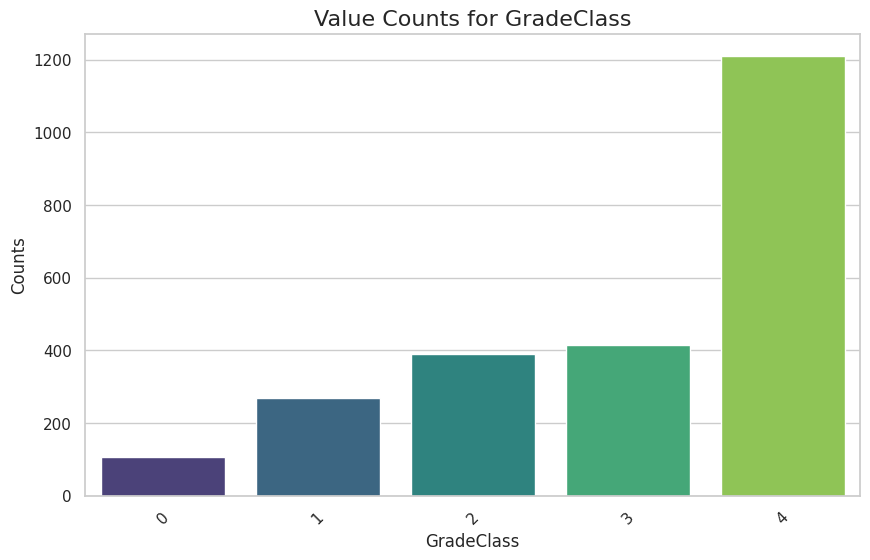

In [38]:
sns.set(style="whitegrid")

# List of columns to exclude
exclude_columns = ['StudyTimeWeekly']

for column in df.columns:
    if column not in exclude_columns:
        plt.figure(figsize=(10, 6))
        value_counts = df[column].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
        plt.title(f'Value Counts for {column}', fontsize=16)
        plt.xlabel(f'{column}', fontsize=12)
        plt.ylabel('Counts', fontsize=12)
        plt.xticks(rotation=45)
        plt.show()


In [39]:
# Function to replace outliers using IQR method
def replace_outliers_iqr(df):
    for column in df.columns:
        if df[column].dtype in [np.float64, np.int64]:  # Only process numeric columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            upper_cap = Q3 + 1.5 * IQR
            lower_cap = Q1 - 1.5 * IQR

            df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])
            df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])

    return df


GradeClass = df['GradeClass']
cf = df.drop(columns=['GradeClass'])

cleaned_data = replace_outliers_iqr(cf)

cleaned_data['GradeClass'] = GradeClass

df = cleaned_data

In [40]:
df

Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0     17.0     1.0        0.0                2.0        19.833723       7.0   
1     18.0     0.0        0.0                1.0        15.408756       0.0   
2     15.0     0.0        2.0                3.0         4.210570      26.0   
3     17.0     1.0        0.0                3.0        10.028829      14.0   
4     17.0     1.0        0.0                2.0         4.672495      17.0   
...    ...     ...        ...                ...              ...       ...   
2387  18.0     1.0        0.0                3.0        10.680555       2.0   
2388  17.0     0.0        0.0                1.0         7.583217       4.0   
2389  16.0     1.0        0.0                2.0         6.805500      20.0   
2390  16.0     1.0        1.0                0.0        12.416653      17.0   
2391  16.0     1.0        0.0                2.0        17.819907      13.0   

      Tutoring  ParentalSupport  Extracurricular  Sports  Music  Volunteering  \
0          1.0              2.0              0.0     0.0    0.0           0.0   
1          0.0              1.0              0.0     0.0    0.0           0.0   
2          0.0              2.0              0.0     0.0    0.0           0.0   
3          0.0              3.0              1.0     0.0    0.0           0.0   
4          1.0              3.0              0.0     0.0    0.0           0.0   
...        ...              ...              ...     ...    ...           ...   
2387       0.0              4.0              1.0     0.0    0.0           0.0   
2388       1.0              4.0              0.0     1.0    0.0           0.0   
2389       0.0              2.0              0.0     0.0    0.0           0.0   
2390       0.0              2.0              0.0     1.0    0.0           0.0   
2391       0.0              2.0              0.0     0.0    0.0           0.0   

      GradeClass  
0              2  
1              1  
2              4  
3              3  
4              4  
...          ...  
2387           0  
2388           4  
2389           2  
2390           1  
2391           1  

[2392 rows x 13 columns]

In [41]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state = 5)

In [42]:
x = df.drop(['GradeClass'],axis=1)
y = df['GradeClass']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=1)

In [43]:
x_sm , y_sm = smt.fit_resample(x_train,y_train)

In [44]:
counter = Counter(y_sm)
print('After', counter)

After Counter({4: 963, 2: 963, 3: 963, 1: 963, 0: 963})


In [45]:
mmy = MinMaxScaler((0,4))
mm_StudyTimeWeekly = MinMaxScaler(feature_range=(0, 4))
mm_Age = MinMaxScaler(feature_range=(0, 4))
mm_Absences = MinMaxScaler(feature_range=(0, 4))

x_sm['StudyTimeWeekly'] = mm_StudyTimeWeekly.fit_transform(x_sm['StudyTimeWeekly'].values.reshape(-1,1))
x_sm['Age'] = mm_Age.fit_transform(x_sm['Age'].values.reshape(-1,1))
x_sm['Absences'] = mm_Absences.fit_transform(x_sm['Absences'].values.reshape(-1,1))


x_test['StudyTimeWeekly'] = mm_StudyTimeWeekly.transform(x_test['StudyTimeWeekly'].values.reshape(-1,1))
x_test['Age'] = mm_Age.transform(x_test['Age'].values.reshape(-1,1))
x_test['Absences'] = mm_Absences.fit_transform(x_test['Absences'].values.reshape(-1,1))


y_mm_train = mmy.fit_transform(y_sm.values.reshape(-1,1))
y_mm_test = mmy.transform(y_test.values.reshape(-1,1))

In [46]:
x_sm

Age    Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0     4.000000  0.000000   0.000000           1.000000         1.108614   
1     4.000000  1.000000   1.000000           1.000000         3.066269   
2     2.666667  1.000000   1.000000           3.000000         0.827484   
3     0.000000  0.000000   1.000000           2.000000         0.886323   
4     1.333333  1.000000   0.000000           2.000000         2.231714   
...        ...       ...        ...                ...              ...   
4810  4.000000  0.296917   1.000000           2.445376         3.684852   
4811  0.000000  0.000000   0.660053           2.330027         0.234644   
4812  0.000000  1.000000   0.308030           1.308030         2.034550   
4813  1.333333  1.000000   1.000000           1.350635         3.903491   
4814  2.666667  0.825170   0.524491           1.825170         0.048804   

      Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0     1.517241   0.00000          2.00000          0.00000     0.0    0.0   
1     1.793103   1.00000          4.00000          0.00000     0.0    0.0   
2     2.482759   0.00000          1.00000          1.00000     0.0    0.0   
3     2.758621   0.00000          2.00000          1.00000     1.0    0.0   
4     2.068966   0.00000          3.00000          0.00000     0.0    0.0   
...        ...       ...              ...              ...     ...    ...   
4810  1.931034   0.00000          3.00000          0.00000     0.0    0.0   
4811  1.057927   0.00000          2.00000          0.00000     0.0    0.0   
4812  2.068966   0.69197          1.38394          0.69197     0.0    0.0   
4813  2.158533   0.00000          3.29873          1.00000     0.0    0.0   
4814  0.827586   0.00000          1.00000          0.00000     1.0    0.0   

      Volunteering  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
...            ...  
4810           0.0  
4811           0.0  
4812           0.0  
4813           0.0  
4814           0.0  

[4815 rows x 12 columns]

In [47]:
y_sm

GradeClass
Loading ITables v2.2.1 from the internet... (need help?)


In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = XGBClassifier(n_estimators=150, max_depth=2,
                      learning_rate=0.1, subsample=0.5,
                      colsample_bytree=0.7, random_state=42)

model.fit(x_sm, y_sm)

y_pred = model.predict(x_test)

print('Test Metrics')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1: ', f1_score(y_test, y_pred, average='macro'))

print('##################################################################')

y_pred_train = model.predict(x_sm)

print('Train Metrics')
print('Accuracy: ', accuracy_score(y_sm, y_pred_train))
print('Precision: ', precision_score(y_sm, y_pred_train, average='macro'))
print('Recall: ', recall_score(y_sm, y_pred_train, average='macro'))
print('F1: ', f1_score(y_sm, y_pred_train, average='macro'))


Test Metrics
Accuracy:  0.7139874739039666
Precision:  0.5915031526753042
Recall:  0.5445297725386713
F1:  0.5512500461277032
##################################################################
Train Metrics
Accuracy:  0.7364485981308411
Precision:  0.739144855117926
Recall:  0.7364485981308411
F1:  0.7352661434598785
